In [20]:
!pip install transformers

In [21]:
from transformers import BertTokenizer, BertModel
import torch



In [22]:
sentence1 = "This is the first sentence"
sentence2 = "I am going on a vacation"
sentence3 = "This is the second sentence"
sentence4 = "She loves travelling on vacations"

In [23]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
tt = tokenizer(sentence2, return_tensors="pt", padding=True, truncation=True)

In [25]:
tt

{'input_ids': tensor([[  101,  1045,  2572,  2183,  2006,  1037, 10885,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [26]:
# Define a function to get sentence embeddings
def get_sentence_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    # Apply mean pooling along the token embeddings
    mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden_states.size())
    sum_hidden_states = torch.sum(last_hidden_states * mask, 1)
    mean_pooled = sum_hidden_states / mask.sum(1)
    return mean_pooled



In [27]:
# Example usage


embedding1 = get_sentence_embedding(sentence1)
embedding2 = get_sentence_embedding(sentence2)
embedding3 = get_sentence_embedding(sentence3)
embedding4 = get_sentence_embedding(sentence4)
print(embedding1.shape)  # Output: torch.Size([1, 768]) for 'bert-base-uncased'
print(embedding2.shape)  # Output: torch.Size([1, 768]) for 'bert-base-uncased'

torch.Size([1, 768])
torch.Size([1, 768])


In [28]:
embedding2.size()

torch.Size([1, 768])

In [29]:


# Example sentence
sentence = "This is an example sentence for padding."

# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)

# Set the desired fixed length
fixed_length = 30

# Pad or truncate the tokens to the fixed length
if len(tokens) < fixed_length:
    # If the sentence is shorter than the fixed length, pad it with [PAD] tokens
    tokens = tokens + ["[PAD]"] * (fixed_length - len(tokens))
elif len(tokens) > fixed_length:
    # If the sentence is longer than the fixed length, truncate it
    tokens = tokens[:fixed_length]

# Ensure the tokens are exactly of length fixed_length
assert len(tokens) == fixed_length

# Convert the tokens back to a sentence
padded_sentence = tokenizer.convert_tokens_to_string(tokens)

print(padded_sentence)


this is an example sentence for padding . [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [30]:
tokens

['this',
 'is',
 'an',
 'example',
 'sentence',
 'for',
 'pad',
 '##ding',
 '.',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [31]:
type(embedding1)

torch.Tensor

In [32]:
import numpy as np

In [36]:
embed1 = embedding1.detach().numpy()
embed2 = embedding2.detach().numpy()
embed3 = embedding3.detach().numpy()
embed4 = embedding4.detach().numpy()

In [34]:
docu_embed = np.append(embed1,embed2,axis=0)

In [37]:
docu_embed = np.append(docu_embed,embed3,axis=0)

In [39]:
docu_embed = np.append(docu_embed,embed4,axis=0)

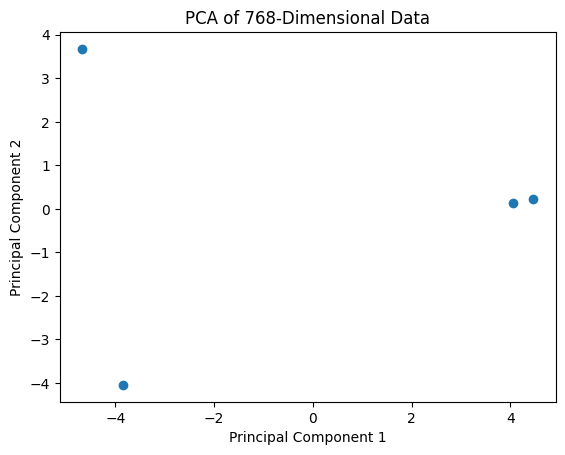

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate some example data (replace with your actual data)
num_samples = 100
num_features = 768
data = docu_embed #np.random.rand(num_samples, num_features)

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a scatter plot of the reduced-dimensional data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 768-Dimensional Data')
plt.show()


In [ ]:
docu_embed

In [ ]:
data

In [ ]:
np.random.rand(3, 2)